In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flat

In [2]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train[0].shape

(32, 32, 3)

In [3]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
#                                verbose=1, save_best_only=True)

model.fit(x_train, y_train, 
          validation_data=(x_test, y_test),
          epochs=1, batch_size=20, verbose=1) #callbacks=[checkpointer], verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 32s 642us/step - loss: -55.7984 - acc: 0.1000 - val_loss: -55.7984 - val_acc: 0.1000


In [4]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 156us/step


[-55.798349920654296, 0.1]

2


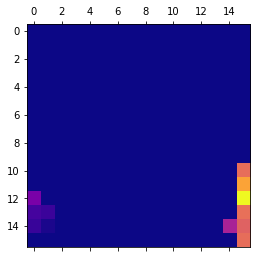

In [34]:
import matplotlib.pyplot as plt
from keras.models import Model

test_img = x_test[:1]

# print(model.layers)

# ref: https://towardsdatascience.com/understanding-your-convolution-network-with-visualizations-a4883441533b
def visualize_layer(model, test_img, layer_slice:int=2):
    layer_outputs = [layer.output for layer in model.layers[:layer_slice]]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    return activation_model.predict(test_img)

activations = visualize_layer(model, test_img)


plt.matshow(activations[1][0, :, :, 15], cmap='plasma')
plt.show()